In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
amazon_ratings = pd.read_csv('Dataset/dataset final.csv')
#amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,userID,id,productID,asins,brand,categories,colors,count,dateAdded,dateUpdated,...,prices.offer,prices.shipping,prices.sourceURLs,reviews,sizes,skus,sourceURLs,upc,ratings,timestamp
0,A39HTATAQ9V7YF,AVpfHrJ6ilAPnD_xVXOI,205616461,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,...,REDUCED USD 12.10,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.99E+11,5,1369699200
1,A3JM6GV9MNOF9X,AVpfHrJ6ilAPnD_xVXOI,558925278,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,...,REDUCED USD 12.10,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.99E+11,3,1355443200
2,A1Z513UWSAAO0F,AVpfHsWP1cnluZ0-eVZ7,558925278,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,5,1404691200
3,A1WMRR494NWEWV,AVpfHsWP1cnluZ0-eVZ7,733001998,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,4,1382572800
4,A3IAAVS479H7M7,AVpfHsWP1cnluZ0-eVZ7,737104473,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,1,1274227200


In [3]:
amazon_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   userID              1068 non-null   object 
 1   id                  1068 non-null   object 
 2   productID           1068 non-null   object 
 3   asins               116 non-null    object 
 4   brand               1061 non-null   object 
 5   categories          1068 non-null   object 
 6   colors              604 non-null    object 
 7   count               0 non-null      float64
 8   dateAdded           1068 non-null   object 
 9   dateUpdated         1068 non-null   object 
 10  descriptions        573 non-null    object 
 11  dimension           150 non-null    object 
 12  ean                 596 non-null    float64
 13  features            818 non-null    object 
 14  imageURLs           1001 non-null   object 
 15  keys                1068 non-null   object 
 16  manufa

In [4]:
amazon_ratings['count'] = amazon_ratings['count'].apply(lambda x:np.random.randint(1, 10))

In [5]:
amazon_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   userID              1068 non-null   object 
 1   id                  1068 non-null   object 
 2   productID           1068 non-null   object 
 3   asins               116 non-null    object 
 4   brand               1061 non-null   object 
 5   categories          1068 non-null   object 
 6   colors              604 non-null    object 
 7   count               1068 non-null   int64  
 8   dateAdded           1068 non-null   object 
 9   dateUpdated         1068 non-null   object 
 10  descriptions        573 non-null    object 
 11  dimension           150 non-null    object 
 12  ean                 596 non-null    float64
 13  features            818 non-null    object 
 14  imageURLs           1001 non-null   object 
 15  keys                1068 non-null   object 
 16  manufa

In [6]:
amazon_ratings

,userID,id,productID,asins,brand,categories,colors,count,dateAdded,dateUpdated,...,prices.offer,prices.shipping,prices.sourceURLs,reviews,sizes,skus,sourceURLs,upc,ratings,timestamp
0,A39HTATAQ9V7YF,AVpfHrJ6ilAPnD_xVXOI,205616461,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,9,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,...,REDUCED USD 12.10,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.99E+11,5,1369699200
1,A3JM6GV9MNOF9X,AVpfHrJ6ilAPnD_xVXOI,558925278,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,6,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,...,REDUCED USD 12.10,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.99E+11,3,1355443200
2,A1Z513UWSAAO0F,AVpfHsWP1cnluZ0-eVZ7,558925278,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,9,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,5,1404691200
3,A1WMRR494NWEWV,AVpfHsWP1cnluZ0-eVZ7,733001998,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,9,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,4,1382572800
4,A3IAAVS479H7M7,AVpfHsWP1cnluZ0-eVZ7,737104473,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,7,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,1,1274227200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,A3OFKO6HR06L0V,AVpfHJSGilAPnD_xVMFU,9790771010,NaN,PUMA,"Men's Casual Shoes,Shoes,Men's Shoes,Clothing",White,3,2016-11-15T13:14:59Z,2016-11-15T13:14:59Z,...,REDUCED USD 23.02,NaN,https://www.walmart.com/ip/Puma-evoSpeed-1-4-S...,NaN,12,NaN,https://www.walmart.com/ip/Puma-evoSpeed-1-4-S...,8.89E+11,2,1358467200
1064,A3KL8WSLJPSWMR,AVpe7cFYilAPnD_xRF9d,9790771339,NaN,Nike,"Clothing, Shoes & Accessories,Men's Shoes,Athl...",Multi-Color,8,2016-03-04T05:43:58Z,2016-03-04T05:43:58Z,...,NaN,NaN,http://www.ebay.com/itm/New-Mens-Nike-Jordan-E...,NaN,10,"[{""sourceURLs"":[""http://www.ebay.com/itm/New-M...",http://www.ebay.com/itm/New-Mens-Nike-Jordan-E...,8.88E+11,5,1355011200
1065,AHUQSDM26UH5C,AVpfVKLGilAPnD_xZxjH,9790771347,NaN,SKECHERS,"Men's Casual Shoes,Shoes,Men's Shoes,Clothing",NaN,5,2016-11-11T09:46:36Z,2016-11-11T09:46:36Z,...,NaN,NaN,https://www.walmart.com/ip/SKECHERS-77066-BLK-...,NaN,NaN,NaN,https://www.walmart.com/ip/SKECHERS-77066-BLK-...,NaN,3,1348790400
1066,ATJ6S9R0W10JS,AVpfVB2E1cnluZ0-it1Q,9790771401,NaN,Georgia Boot,"Home Improvement,Men's Work & Safety Shoes,All...",NaN,9,2016-02-25T21:08:16Z,2016-06-08T05:29:32Z,...,NaN,NaN,http://www.walmart.com/ip/GEORGIA-BOOT-G4374-9...,NaN,NaN,NaN,http://www.walmart.com/ip/GEORGIA-BOOT-G4374-9...,NaN,5,1389398400


In [7]:
amazon_ratings = amazon_ratings.fillna(0)

In [8]:
amazon_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   userID              1068 non-null   object 
 1   id                  1068 non-null   object 
 2   productID           1068 non-null   object 
 3   asins               1068 non-null   object 
 4   brand               1068 non-null   object 
 5   categories          1068 non-null   object 
 6   colors              1068 non-null   object 
 7   count               1068 non-null   int64  
 8   dateAdded           1068 non-null   object 
 9   dateUpdated         1068 non-null   object 
 10  descriptions        1068 non-null   object 
 11  dimension           1068 non-null   object 
 12  ean                 1068 non-null   float64
 13  features            1068 non-null   object 
 14  imageURLs           1068 non-null   object 
 15  keys                1068 non-null   object 
 16  manufa

In [9]:
amazon_ratings

,userID,id,productID,asins,brand,categories,colors,count,dateAdded,dateUpdated,...,prices.offer,prices.shipping,prices.sourceURLs,reviews,sizes,skus,sourceURLs,upc,ratings,timestamp
0,A39HTATAQ9V7YF,AVpfHrJ6ilAPnD_xVXOI,205616461,0,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",0,9,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,...,REDUCED USD 12.10,0,https://www.walmart.com/ip/Josmo-8190-Plain-In...,0,0,0,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.99E+11,5,1369699200
1,A3JM6GV9MNOF9X,AVpfHrJ6ilAPnD_xVXOI,558925278,0,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",0,6,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,...,REDUCED USD 12.10,0,https://www.walmart.com/ip/Josmo-8190-Plain-In...,0,0,0,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.99E+11,3,1355443200
2,A1Z513UWSAAO0F,AVpfHsWP1cnluZ0-eVZ7,558925278,0,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",0,9,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,...,0,0,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,0,0,0,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,0,5,1404691200
3,A1WMRR494NWEWV,AVpfHsWP1cnluZ0-eVZ7,733001998,0,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",0,9,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,...,0,0,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,0,0,0,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,0,4,1382572800
4,A3IAAVS479H7M7,AVpfHsWP1cnluZ0-eVZ7,737104473,0,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",0,7,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,...,0,0,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,0,0,0,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,0,1,1274227200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,A3OFKO6HR06L0V,AVpfHJSGilAPnD_xVMFU,9790771010,0,PUMA,"Men's Casual Shoes,Shoes,Men's Shoes,Clothing",White,3,2016-11-15T13:14:59Z,2016-11-15T13:14:59Z,...,REDUCED USD 23.02,0,https://www.walmart.com/ip/Puma-evoSpeed-1-4-S...,0,12,0,https://www.walmart.com/ip/Puma-evoSpeed-1-4-S...,8.89E+11,2,1358467200
1064,A3KL8WSLJPSWMR,AVpe7cFYilAPnD_xRF9d,9790771339,0,Nike,"Clothing, Shoes & Accessories,Men's Shoes,Athl...",Multi-Color,8,2016-03-04T05:43:58Z,2016-03-04T05:43:58Z,...,0,0,http://www.ebay.com/itm/New-Mens-Nike-Jordan-E...,0,10,"[{""sourceURLs"":[""http://www.ebay.com/itm/New-M...",http://www.ebay.com/itm/New-Mens-Nike-Jordan-E...,8.88E+11,5,1355011200
1065,AHUQSDM26UH5C,AVpfVKLGilAPnD_xZxjH,9790771347,0,SKECHERS,"Men's Casual Shoes,Shoes,Men's Shoes,Clothing",0,5,2016-11-11T09:46:36Z,2016-11-11T09:46:36Z,...,0,0,https://www.walmart.com/ip/SKECHERS-77066-BLK-...,0,0,0,https://www.walmart.com/ip/SKECHERS-77066-BLK-...,0,3,1348790400
1066,ATJ6S9R0W10JS,AVpfVB2E1cnluZ0-it1Q,9790771401,0,Georgia Boot,"Home Improvement,Men's Work & Safety Shoes,All...",0,9,2016-02-25T21:08:16Z,2016-06-08T05:29:32Z,...,0,0,http://www.walmart.com/ip/GEORGIA-BOOT-G4374-9...,0,0,0,http://www.walmart.com/ip/GEORGIA-BOOT-G4374-9...,0,5,1389398400


In [10]:
amazon_ratings.shape

(1068, 38)

In [11]:
popular_products = pd.DataFrame(amazon_ratings.groupby('productID')['ratings'].count())
most_popular = popular_products.sort_values('ratings', ascending=False)
most_popular.head(10)

,ratings
productID,
9746427962,41
9759091062,40
9788071198,36
7806397051,35
9788072216,34
3227001381,25
9788073409,20
9788073840,20
9748776093,19


<AxesSubplot:xlabel='productID'>

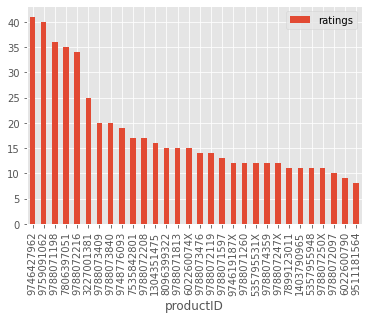

In [12]:
most_popular.head(30).plot(kind = "bar")

In [13]:
ratings_utility_matrix = amazon_ratings.pivot_table(values='ratings', index='userID', columns='productID', fill_value=0)
ratings_utility_matrix.head()

productID,1304139212,1304139220,130414089X,130414643X,1304146537,130414674X,1304168522,1304174778,1304174867,1304174905,...,9790770839,9790770871,9790770898,9790770944,9790770995,9790771002,9790771010,9790771339,9790771347,9790771401
userID,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A05492663T95KW63BR75K,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A100GYE1W4OXZ8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A10205RFE66H1R,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
ratings_utility_matrix.shape

(1016, 295)

In [15]:
X = ratings_utility_matrix.T
X.head()

userID,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A05492663T95KW63BR75K,A100GYE1W4OXZ8,A10205RFE66H1R,A104D62WJII6KP,A108HJD2ESJXUY,A10GKM76NOQLGE,A10R4813UIW6GH,A10REFE1TW3ZVT,...,AYI1LDJYGG0ZK,AYM7E80UCJX7I,AYTK85H56WQ5F,AYYB9EFFG2GVA,AZ4FR14IPKML7,AZGGH4GS18RUN,AZLE2XFH3JUNG,AZLYAJ8XE443K,AZWRTJPN7NXT,AZYQEFB9Y5N22
productID,,,,,,,,,,,,,,,,,,,,,
1304139212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304139220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414089X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414643X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304146537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X.shape

(295, 1016)

In [17]:
X1 = X

In [18]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(295, 10)

In [19]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(295, 295)

In [20]:
X.index[199]

'9788072119'

In [21]:
i = "9788072119"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

199

In [22]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(295,)

In [23]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:15]

['5297000963', '9788071570', '9788072097']